## Urban air pollution project


### TOC (table of content)
1. [Load packages](#loading_packages)
2. [Load data](#loading_data)
3. [EDA technical](#technical_eda)
4. [Hypothesis](#hypothesis)

5. [Feature engineering](#feature_engineering)


<a id='loading_packages'/>

Loading packages

In [2]:
import pandas as pd
import numpy as np

from time import time

# Import visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import parallel_coordinates

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
# from sklearn.inspection import plot_partial_dependence



# Import functions from own Python-File (see visuals_script.py in Repo)
#import visuals_script as vs

# Pretty display for notebooks
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
RSEED=42


## TOC
### Import data

<a id='loading_data'/>

Loading Data

In [3]:
df = pd.read_csv('data/Train.csv')

<a id='technical_eda'/>

EDA Technical

In [4]:
pd.set_option('display.max_rows',None)
df.columns


Index(['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min',
       'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
   

In [ ]:
df.shape

In [ ]:
df.dtypes

In [5]:
df.describe()

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
count,30557.000000,30557.000000,30557.000000,3.055700e+04,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,...,23320.000000,23320.000000,23320.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000
mean,61.148045,29.025866,117.992234,7.983756e+03,125.831135,15.302326,70.552747,0.006004,9.321342,0.416886,...,35.590916,-123.697777,46.533951,923.231949,1711.793613,0.016227,1.254703,13.849040,-69.098594,23.100630
std,46.861309,33.119775,100.417713,4.863090e+04,146.581856,10.688573,18.807884,0.003787,9.343226,2.707990,...,18.955228,71.916036,14.594267,929.633988,1741.299304,0.027016,55.101250,18.004375,84.702355,24.786350
min,1.000000,1.000000,1.000000,0.000000e+00,2.000000,0.420044,5.128572,0.000139,-34.647879,-15.559646,...,0.000000,-179.880630,0.000000,0.000000,0.000000,0.000000,-105.367363,0.000000,-179.947422,0.000000
25%,25.000000,5.000000,60.000000,1.064920e+03,44.000000,7.666667,58.600002,0.003403,3.123071,-1.097864,...,19.451524,-165.882624,36.693094,0.000000,0.000000,0.000000,0.000000,0.000000,-161.726937,0.000000
50%,50.000000,15.000000,91.000000,2.395350e+03,72.000000,12.200000,74.099998,0.004912,8.478424,0.222092,...,37.918838,-156.637162,47.445010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,44.000000,155.000000,5.882550e+03,150.000000,19.900000,85.450001,0.007562,16.201563,1.772925,...,52.270055,-118.453598,57.438181,1861.674119,3393.541633,0.023829,62.245728,27.412303,0.000000,47.090635
max,815.000000,438.000000,999.000000,1.841490e+06,1552.000000,72.599998,100.000000,0.021615,37.437921,17.955124,...,66.111289,179.776125,79.631711,2112.522949,6478.550544,0.210483,77.355232,59.972710,179.813344,69.992363


In [ ]:
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().value_counts()

#### check outliers for target

<Axes: xlabel='target', ylabel='Count'>

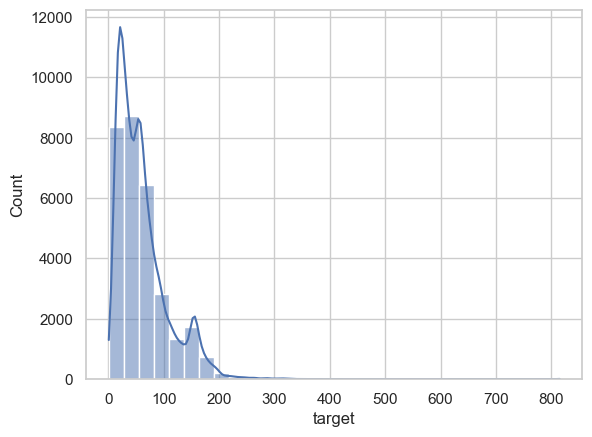

In [4]:
sns.histplot(df, x='target', bins=30, kde=True)

<Axes: >

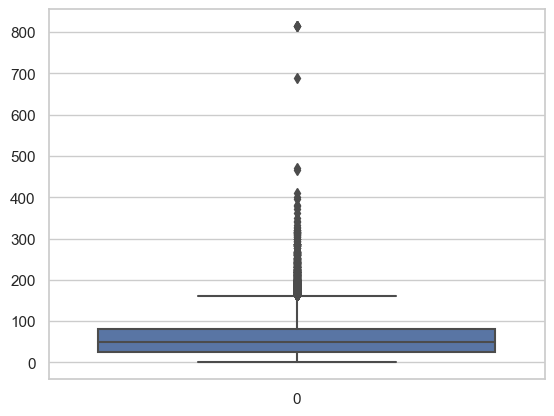

In [5]:
sns.boxplot(df['target'])

we see that the data are exponentially distributed. The box plot shows very high amount of outliers. However, because of the exponential distribution, we can log transfor the target value to reduce the number of 'actual' outliers.

<Axes: >

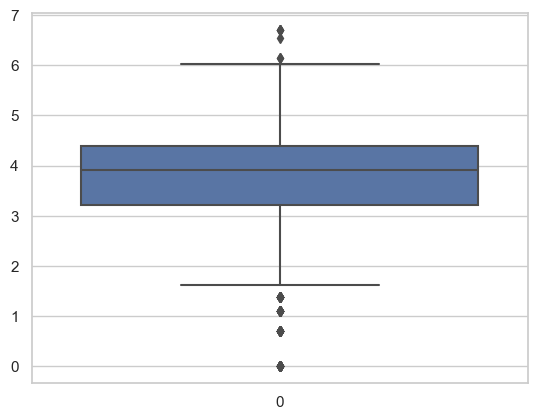

In [6]:
sns.boxplot(df['target'].apply(np.log))

Conclusion is we need to set the treshold: the following code calculates the maximum value for the target that we will use for the training. (this is: we remove the highest seven points).

In [10]:
q1=df['target'].apply(np.log).quantile(0.25)
q3=df['target'].apply(np.log).quantile(0.75)
IQR=q3-q1
max_target = np.exp((q3+1.5*IQR)) 
print(max_target)

457.9467217919567


Hypothsis
<a id='hypothesis'/>

- higher gas column densities, higher target value
- Q: higher wind velocity, lower target value?
    A: true
- humidity correlated non-linearly with target value
- satellite angle correlates with measured column density
- stratospheric column density no correlation with target value
- aerosol index with target value
- AER_AI_sensor_altitude  nega-corr target value

H1: higher gas column densities, higher target value

In [ ]:
df.corr(numeric_only=True).iloc[0].sort_values(ascending=False)

In [ ]:
sns.regplot(df, x = 'L3_CO_CO_column_number_density', y = 'target',
            scatter_kws = {"color": "blue", "alpha": 0.5},
            line_kws = {"color": "red"}
           )
plt.xlim(0, 0.175)
plt.ylim(0, 400)
plt.show()

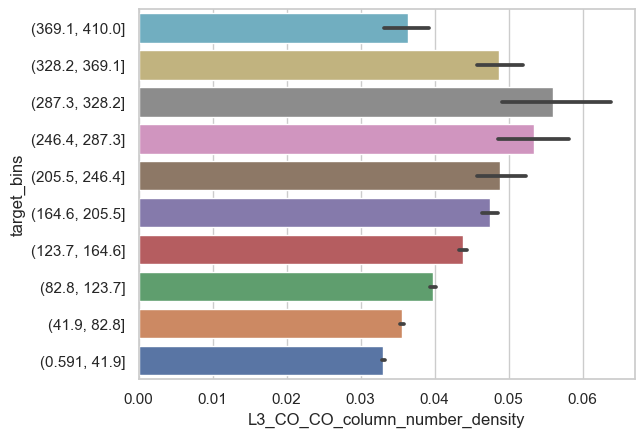

In [12]:
df_1 = df[df['target'] < 458]
df_temp=df_1.copy()
df_temp['target_bins']=pd.cut(df_temp['target'], bins=10)
sns.barplot(df_temp, x='L3_CO_CO_column_number_density', y='target_bins').invert_yaxis()

H2: - Q: higher wind velocity, lower target value?
    A: true

In [13]:
df_abs = df_temp.copy()
df_abs['u_component_of_wind_10m_above_ground'] = df_temp['u_component_of_wind_10m_above_ground'].abs()

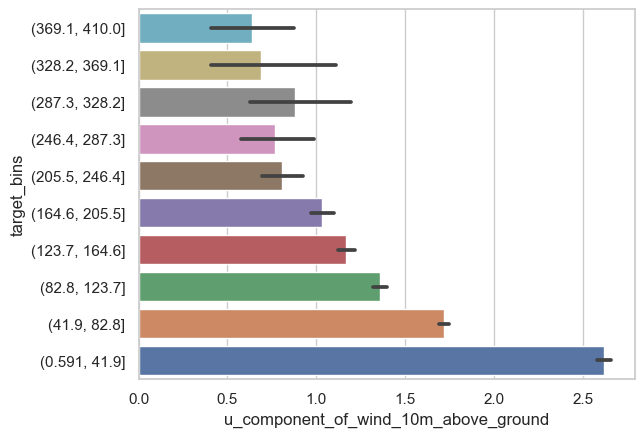

In [16]:
sns.barplot(df_abs, x='u_component_of_wind_10m_above_ground', y='target_bins').invert_yaxis()

H3: - humidity correlated non-linearly with target value

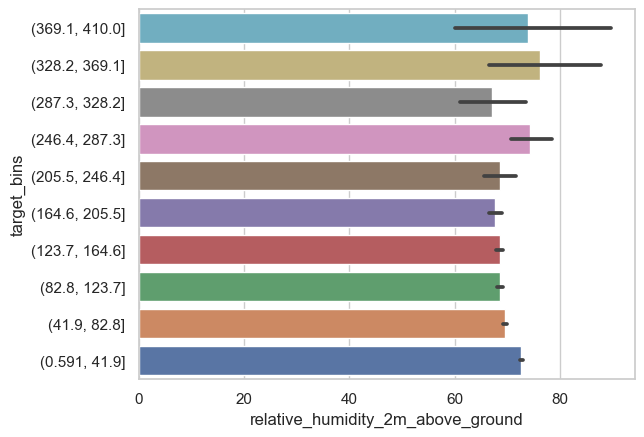

In [18]:
sns.barplot(df_temp, x='relative_humidity_2m_above_ground', y='target_bins').invert_yaxis()
#plt.xlim(60, 100)
#plt.show()

Feature Engineering
<a id='feature_engineering'/>

In [19]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')